In [449]:
import re #more like import the fukken antichrist

keyword_list = ['kurwa', 'ja', '9gag', 'vo', 'bitch', 'kom dan', 'jonko', 'broer', 'dominion', 'any']

In [450]:
def History_to_data(name, path_to_history, group_name = "private"):
    """This will create a txt file with only the times and dates that dennis 
    fucking send you a 9gag link.
    name: str, name of dennis in your whatsapp history
    path_to_history: str, path to whatsapp.txt history file
    save_path: str, will save the clean history at this path. Default is clean.txt
    group_name: str, specify the group name. If the data is not from a group simply leave open."""                     
    history = open(path_to_history, 'r', encoding='utf-8')
    text = history.read()
    
    date_regex = "(\d{2}[\W\D]\d{2}[\W\D]\d{2})[\W\D]+(\d{2}[\W\D]\d{2})[\W\s]+"
    for keyword in keyword_list: #various keyword check
        reg_ex = (date_regex+ name +":[^\n]+(" + keyword +
                  ")[^\n]+\n"+date_regex +"([^:]+):")
        filtered_history = re.findall(reg_ex, text)
    
        f = open(keyword + ".txt", 'w')
        for line in filtered_history:
            f.write(','.join(line) + ','+ group_name + '\n')
        f.close()
    #check if 9gag got posted from android
    reg_ex =  (date_regex + name +
               ":[^\n]+9gag.com[^\n](android)[^\n]+\n" + date_regex +"([^:]+):")
    
    filtered_history = re.findall(reg_ex, text)
    
    f = open("android.txt", 'w')
    for line in filtered_history:
        f.write(','.join(line) + ',' + group_name + '\n')
    f.close()
    
    history.close()
    
    return

In [451]:
History_to_data("Dennis Bouwman", "WhatsApp-chat met Zeiken&afgezeiken worden.txt")

In [452]:
import pandas as pd

In [453]:
def read_file(keyword):
    _db=pd.read_csv(keyword+'.txt', header=None)
    
    db = pd.DataFrame()
    db['date sent'] = pd.to_datetime(_db[0] + " " + _db[1])
    db['keyword'] = _db[2]
    db['replied by'] = _db[5]
    db['chat type'] = _db[6]
    db['date replied'] = pd.to_datetime(_db[0] + " " + _db[1])
    return db

In [454]:
db = pd.DataFrame()
for key in keyword_list:
    try:
        db = db.append(read_file(key))
    except:
        print(f'File {key}.txt is empty!')

File kom dan.txt is empty!


In [4]:
res = db['date sent'].groupby([db['date sent'].dt.hour]).count()


NameError: name 'db' is not defined

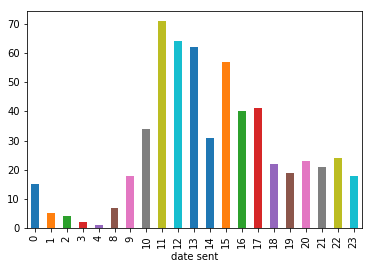

In [456]:
res.plot(kind='bar')

In [457]:
import matplotlib.pyplot as plt

#  Plot histogram of hour sent, for every word

Text(0.5,0,'hour')

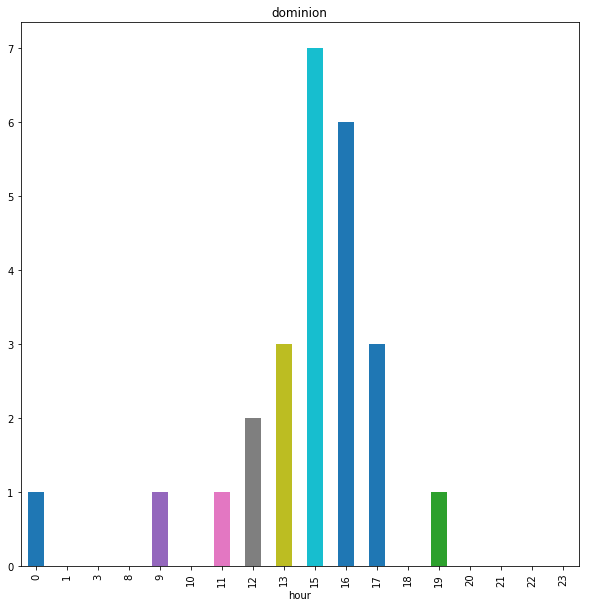

In [475]:
fig, ax = plt.subplots(figsize=(10,10))
hist_data['dominion'].plot(kind='bar', subplots=True, ax=ax);
ax.set_xlabel('hour')

In [466]:
hist_data = pd.DataFrame()
for key, sdf in db.groupby(db['keyword']):
    hist_data[key] = sdf['keyword'].groupby(sdf['date sent'].dt.hour).count()

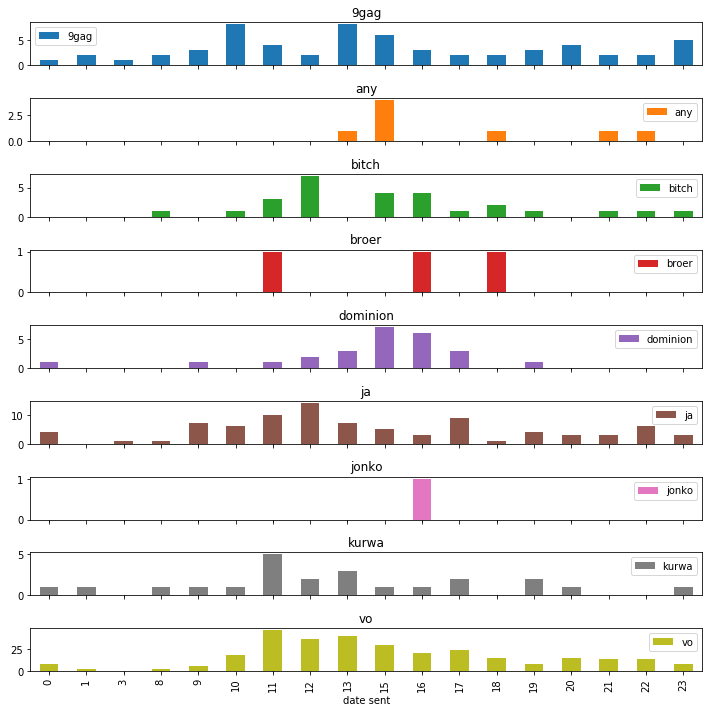

In [467]:
hist_data.plot(kind='bar', figsize=(10,10), subplots=True);
plt.tight_layout()

In [460]:
hist_data = pd.DataFrame()
for key, sdf in db.groupby(db['keyword']):
    hist_data[key] = sdf['keyword'].groupby(sdf['date sent'].dt.month).count()

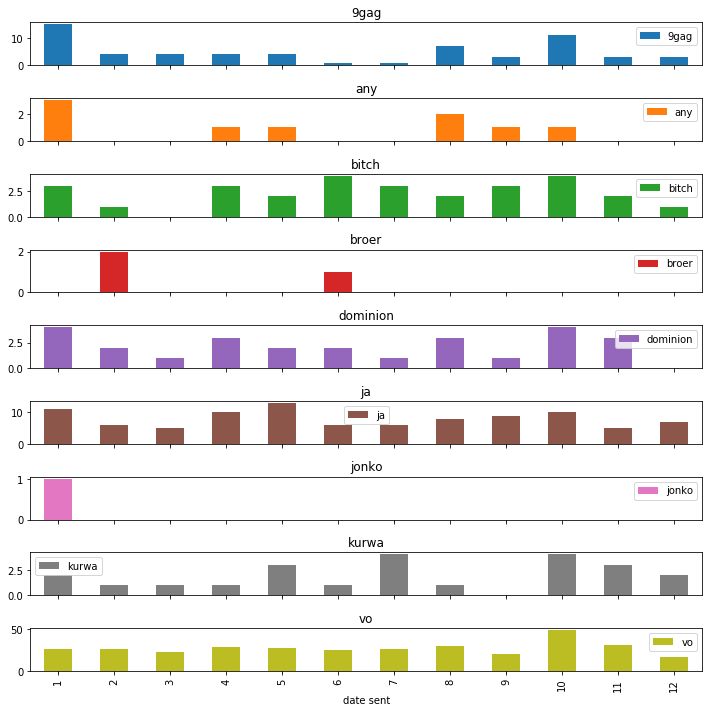

In [461]:
hist_data.plot(kind='bar', figsize=(10,10), subplots=True);
plt.tight_layout()

In [462]:
hist_data = pd.DataFrame()
for key, sdf in db.groupby(db['keyword']):
    hist_data[key] = sdf['keyword'].groupby(sdf['date sent'].dt.year).count()

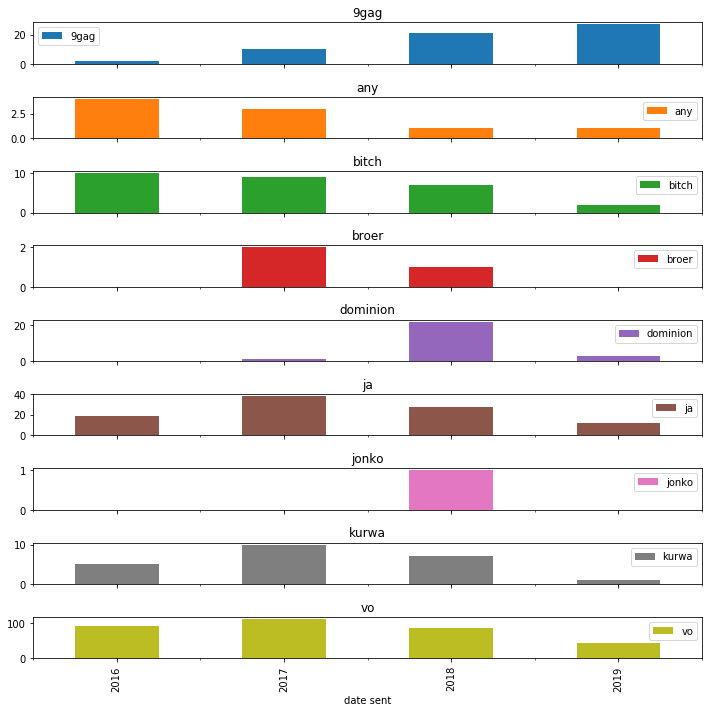

In [463]:
hist_data.plot(kind='bar', figsize=(10,10), subplots=True);
plt.tight_layout()

In [447]:
fname = "WhatsApp-chat met Zeiken&afgezeiken worden.txt"
k = 0
 
word_dict ={}
with open(fname, 'r') as f:
    for line in f:
        words = line.split()
        print(words)
        try:
            if words[3]=='Dennis':
                for i in words:
                    try:
                        word_dict[i] += 1
                    except:
                        word_dict[i] = 1
        except:
            pass
print("Occurrences of the word:")
print(k)

['28-04-16', '11:32', '-', 'Jesse:', 'So', 'fucked', 'right', 'now']
['28-04-16', '11:57', '-', 'Piotr:', 'Lold']
['28-04-16', '12:01', '-', 'Piotr:', 'Dennis', 'hoelaat', 'ben', 'je', 'op', 'de', 'tu', 'dan?']
['28-04-16', '12:02', '-', 'Piotr:', 'En', 'hoe', 'heet', 'de', 'dier?']
['28-04-16', '12:06', '-', 'Markie', 'Kwarkie:', 'Top', 'Dennis']
['28-04-16', '12:48', '-', 'Dennis', 'Bouwman:', 'Ik', 'ben', '13:30', 'op', 'tu', 'voor', 'ei']
['28-04-16', '12:48', '-', 'Piotr:', 'we', 'zijn', 'bij', 'be1']
['28-04-16', '12:48', '-', 'Dennis', 'Bouwman:', 'Ik', 'ben', 'thuis']
['28-04-16', '13:00', '-', 'Markie', 'Kwarkie:', 'Moeten', 'jullie', 'werken?']
['28-04-16', '13:02', '-', 'Piotr:', 'yes']
['28-04-16', '13:02', '-', 'Markie', 'Kwarkie:', 'Ik', 'dacht', 'ik', 'kom', 'in', 'Delft', 'chillen']
['28-04-16', '13:03', '-', 'Markie', 'Kwarkie:', 'Maar', 'dat', 'heeft', 'geen', 'zin', 'als', 'k', 'alleen', 'ben']
['28-04-16', '13:04', '-', 'Piotr:', 'Je', 'was', 'alleen,']
['ben', 'all

In [448]:
sorted(word_dict, key=lambda key: -word_dict[key])

['-',
 'Dennis',
 'Bouwman:',
 'de',
 'is',
 'ik',
 'je',
 'Ik',
 'een',
 'het',
 '<Media',
 'weggelaten>',
 'niet',
 'dat',
 'in',
 'en',
 'wel',
 'op',
 'Maar',
 'dan',
 'ook',
 'En',
 'er',
 'ben',
 'van',
 'heb',
 'met',
 'voor',
 'die',
 'te',
 'kan',
 'nog',
 'als',
 'zijn',
 'bij',
 'Ja',
 'naar',
 'aan',
 'of',
 'we',
 'mn',
 'Ok',
 'maar',
 'zo',
 'ga',
 'al',
 'nu',
 'was',
 'the',
 'om',
 'moet',
 'Dus',
 'Het',
 'dus',
 'geen',
 'gewoon',
 'Wat',
 'doen',
 'mij',
 '04-12-18',
 'ze',
 'wat',
 'Dat',
 'meer',
 '24-08-17',
 'Is',
 'echt',
 'wil',
 'even',
 '23-05-16',
 'over',
 'gaat',
 'kom',
 'Je',
 'jullie',
 'hebben',
 'Wie',
 'weer',
 'toch',
 'deze',
 'goed',
 'zit',
 'a',
 'Ye',
 'I',
 'De',
 'mensen',
 'had',
 'dit',
 'denk',
 'Oh',
 'gaan',
 'heeft',
 'Of',
 'uit',
 'kunnen',
 'tu',
 'Als',
 'hij',
 'it',
 '27-01-17',
 'Mark',
 'weet',
 'We',
 '02-02-17',
 'morgen',
 '20-05-16',
 '😇',
 'iemand',
 'Nee',
 '07-03-19',
 'Want',
 '24-05-16',
 'mee',
 'beetje',
 '02-04-19'

In [446]:
word_dict

{}